In [10]:
import pandas as pd
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [15]:
dset_str = 'train'
dir_data = os.path.expanduser('~/Documents/master3/leomed_scratch')
dir_dataset = os.path.join(dir_data, 'files_small_new')
toy_train_pa = torch.load(os.path.join(dir_dataset, 'toy_train_pa.pt')).numpy()
toy_train_lat = torch.load(os.path.join(dir_dataset, 'toy_train_lat.pt')).numpy()

(70, 128, 128)


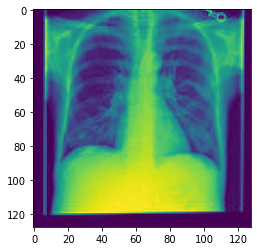

In [16]:
print(toy_train_pa.shape)
plt.imshow(toy_train_pa[0])
plt.show()

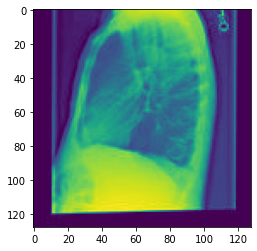

In [17]:
plt.imshow(toy_train_lat[0])
plt.show()

In [21]:
train_labels = pd.read_csv(os.path.join(dir_dataset, 'train_labels.csv')).columns
print(train_labels)

Index(['Unnamed: 0', 'Atelectasis', 'Cardiomegaly', 'Lung Opacity',
       'Pleural Effusion', 'Support Devices', 'No Finding'],
      dtype='object')


In [18]:
str_labels = ['Lung Opacity', 'Pleural Effusion', 'Support Devices']

train_labels = pd.read_csv(os.path.join(dir_dataset, 'train_labels.csv'))[str_labels].fillna(0)
train_labels.head()

,Lung Opacity,Pleural Effusion,Support Devices
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


The labels have 3 classes. Since we use linear classifiers for the evaluation, we remove the 3rd class "unsure" with label -1.
We need to filter out all values where the label is -1 in the dataset.

In [6]:
print(np.unique(train_labels[str_labels].values.ravel(), return_counts=True))
indices = []
indices += train_labels.index[(train_labels['Lung Opacity'] == -1)].tolist()
indices += train_labels.index[(train_labels['Pleural Effusion'] == -1)].tolist()
indices += train_labels.index[(train_labels['Support Devices'] == -1)].tolist()
indices = list(set(indices))
print(train_labels.iloc[indices].head())

(array([-1.,  0.,  1.]), array([  1317, 172334,  11590]))
       Lung Opacity  Pleural Effusion  Support Devices
24581          -1.0               1.0              0.0
16393           1.0              -1.0              0.0
16394           1.0              -1.0              0.0
57373           0.0              -1.0              0.0
8230            0.0              -1.0              0.0


In [7]:
print(len(train_labels), len(indices))
new_train_labels= train_labels.drop(indices)
new_train_labels.head()
print(len(new_train_labels))

61747 1286
60461


## Some of the latent representations are always nans during the basic routine epoch

In [15]:
table = pd.read_csv(os.path.expanduser('~/Documents/master3/leomed_scratch/bugs/basic_routine_epoch.csv'))
for run, subtable in table.groupby('run'):
    print(len(subtable))
    print(pd.DataFrame(subtable.isna().mean().round(4) * 100, columns=['percentage_of_nans']))
    print('\n')

64
                percentage_of_nans
Lateral0_batch                0.00
Lateral0_mean                95.31
Lateral1_batch                0.00
Lateral1_mean                95.31
PA0_batch                     0.00
PA0_mean                     96.88
PA1_batch                     0.00
PA1_mean                     96.88
run                           0.00
text0_batch                   0.00
text0_mean                   95.31
text1_batch                   0.00
text1_mean                   95.31


49
                percentage_of_nans
Lateral0_batch                0.00
Lateral0_mean                95.92
Lateral1_batch                0.00
Lateral1_mean                95.92
PA0_batch                     0.00
PA0_mean                     95.92
PA1_batch                     0.00
PA1_mean                     95.92
run                           0.00
text0_batch                   0.00
text0_mean                   93.88
text1_batch                   0.00
text1_mean                   93.88


36
       